In [233]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
from sklearn.datasets import load_digits, load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

plt.rcParams["text.usetex"] = True
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False

plt.style.use("seaborn-v0_8-whitegrid")

### **1. Simple Neural Network for Iris Dataset**

In [18]:
iris = load_iris()
x = np.asarray(iris.data)  # type: ignore
y = np.asarray(iris.target)  # type: ignore

print(iris.DESCR)  # type: ignore

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

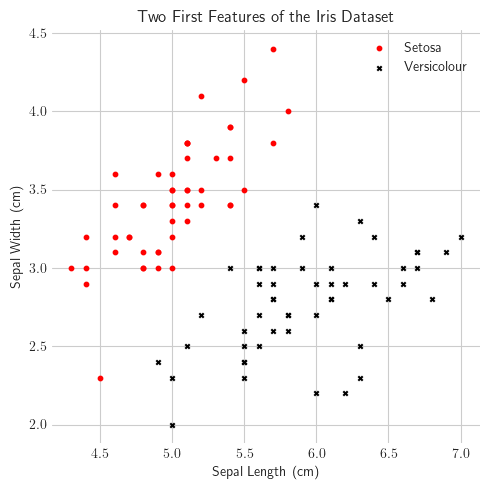

In [ ]:
x = x[y != 2, :2]
y = y[y != 2]

plt.figure(figsize=(5, 5), tight_layout=True)
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color="red", label="Setosa", marker="o", s=10)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color="black", label="Versicolour", marker="x", s=10)
plt.legend()
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Two First Features of the Iris Dataset")
plt.show()


Let's suppose the following simple neural network:

<div align="center">
    <img width="300" src="https://raw.githubusercontent.com/mateuszk098/computer-vision-nets/refs/heads/master/math/g25.png">
</div>

and the MSE loss function:

$$
L = \frac{1}{2}(y - a_2)^2,
$$

then calculating everything by hand, we have:

In [5]:
@dataclass
class NN:
    w0: float = np.random.randn() * 1e-3
    w1: float = np.random.randn() * 1e-3
    w2: float = np.random.randn() * 1e-3
    w3: float = np.random.randn() * 1e-3
    w4: float = np.random.randn() * 1e-3
    w5: float = np.random.randn() * 1e-3
    b0: float = np.random.randn() * 1e-3
    b1: float = np.random.randn() * 1e-3
    b2: float = np.random.randn() * 1e-3


def sigmoid(x: NDArray) -> NDArray:
    return 1 / (1 + np.exp(-x))


def forward(net: NN, x: NDArray) -> NDArray:
    out = np.zeros(len(x))

    for k in range(len(x)):
        z0 = net.w0 * x[k, 0] + net.w2 * x[k, 1] + net.b0
        a0 = sigmoid(z0)
        z1 = net.w1 * x[k, 0] + net.w3 * x[k, 1] + net.b1
        a1 = sigmoid(z1)
        a2 = net.w4 * a0 + net.w5 * a1 + net.b2
        out[k] = a2

    return out


def gradient_descent(net: NN, x: NDArray, y: NDArray, epochs: int, lr: float) -> NN:
    m = len(x)

    for _ in range(epochs):
        dw0 = dw1 = dw2 = dw3 = dw4 = dw5 = db0 = db1 = db2 = 0  # Zero gradients.

        for k in range(m):
            # Forward pass.
            z0 = net.w0 * x[k, 0] + net.w2 * x[k, 1] + net.b0
            a0 = sigmoid(z0)
            z1 = net.w1 * x[k, 0] + net.w3 * x[k, 1] + net.b1
            a1 = sigmoid(z1)
            a2 = net.w4 * a0 + net.w5 * a1 + net.b2

            # Gradients.
            dw5 += (a2 - y[k]) * a1
            dw4 += (a2 - y[k]) * a0
            db2 += a2 - y[k]

            dw3 += (a2 - y[k]) * net.w5 * a1 * (1 - a1) * x[k, 1]
            dw1 += (a2 - y[k]) * net.w5 * a1 * (1 - a1) * x[k, 0]
            db1 += (a2 - y[k]) * net.w5 * a1 * (1 - a1)

            dw2 += (a2 - y[k]) * net.w4 * a0 * (1 - a0) * x[k, 1]
            dw0 += (a2 - y[k]) * net.w4 * a0 * (1 - a0) * x[k, 0]
            db0 += (a2 - y[k]) * net.w4 * a0 * (1 - a0)

        # Update weights. We move in the opposite direction to the gradient.
        # Because we want to minimize the loss function.
        net.w0 -= lr * dw0 / m
        net.w1 -= lr * dw1 / m
        net.w2 -= lr * dw2 / m
        net.w3 -= lr * dw3 / m
        net.w4 -= lr * dw4 / m
        net.w5 -= lr * dw5 / m
        net.b0 -= lr * db0 / m
        net.b1 -= lr * db1 / m
        net.b2 -= lr * db2 / m

    return net


def evaluate(net: NN, x: NDArray, y: NDArray) -> float:
    out = np.where(forward(net, x) > 0.5, 1, 0)
    return np.mean(out == y).item()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(input, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

net = NN()

print("Accuracy Before:", evaluate(net, x_test, y_test))

Accuracy Before: 0.5


In [7]:
net = gradient_descent(net, x_train, y_train, epochs=1000, lr=0.1)

In [8]:
np.where(forward(net, x_test) > 0.5, 1, 0)

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [9]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [10]:
print("Accuracy After:", evaluate(net, x_test, y_test))

Accuracy After: 1.0


### **2. Fully Connected Neural Network for MNIST Dataset**

In [211]:
def one_hot(y: NDArray) -> NDArray:
    return np.eye(len(np.unique(y)))[y]


def mse_loss(y_pred: NDArray, y_true: NDArray) -> float:
    return np.mean((y_pred - y_true) ** 2).item()


def d_mse_loss(y_pred: NDArray, y_true: NDArray) -> NDArray:
    return 2 * (y_pred - y_true) / len(y_true)


class ActivationLayer:
    def forward(self, input: NDArray) -> NDArray:
        self.input = input
        return self.sigmoid(input)

    def backward(self, output_error: NDArray) -> NDArray:
        # dE/dx = dE/dy * dy/dx = grad * d_sigmoid/dx
        input_error = output_error * self.d_sigmoid(self.input)
        return input_error

    def step(self, lr: float) -> None:
        pass

    def sigmoid(self, x: NDArray) -> NDArray:
        return 1 / (1 + np.exp(-x))

    def d_sigmoid(self, x: NDArray) -> NDArray:
        return self.sigmoid(x) * (1 - self.sigmoid(x))


class LinearLayer:
    def __init__(self, in_features: int, out_features: int) -> None:
        self.weight = np.random.randn(in_features, out_features)
        self.bias = np.random.randn(1, out_features)

    def forward(self, input: NDArray) -> NDArray:
        self.input = input
        return input @ self.weight + self.bias

    def backward(self, output_error: NDArray) -> NDArray:
        # dE/dx = dE/dy * dy/dx = grad * d_linear/dx = grad * W.T
        input_error = output_error @ self.weight.T
        # dE/dW = dE/dy * dy/dW = grad * d_linear/dW = x.T @ grad
        self.weight_error = self.input.T @ output_error
        # dE/db = dE/dy * dy/db = grad * d_linear/db = grad
        self.bias_error = output_error.mean(axis=0, keepdims=True)
        return input_error

    def step(self, lr: float) -> None:
        self.weight -= lr * self.weight_error
        self.bias -= lr * self.bias_error

        self.weight_error = np.zeros_like(self.weight)
        self.bias_error = np.zeros_like(self.bias)


class Model:
    def __init__(self) -> None:
        self.layers = list()

    def add(self, layer: LinearLayer | ActivationLayer) -> None:
        self.layers.append(layer)

    def forward(self, x: NDArray) -> NDArray:
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, grad: NDArray) -> None:
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

    def step(self, lr: float) -> None:
        for layer in self.layers:
            layer.step(lr)

    def fit(self, x: NDArray, y: NDArray, epochs: int, batch_size: int, lr: float) -> None:
        m = len(x)
        batches = m // batch_size

        for epoch in range(1, epochs + 1):
            loss = 0
            ids = np.random.permutation(m)
            x = x[ids]
            y = y[ids]

            for i in range(0, m, batch_size):
                x_batch = x[i : i + batch_size]
                y_batch = y[i : i + batch_size]

                y_pred = self.forward(x_batch)
                loss += mse_loss(y_pred, y_batch)
                grad = d_mse_loss(y_pred, y_batch)

                self.backward(grad)
                self.step(lr)

            if epoch % 100 == 0 or epoch == 1:
                print(f"Epoch: {epoch:4d}/{epochs} Loss: {loss / batches:.5f}")

In [230]:
np.random.seed(42)

digits = load_digits()

x = np.asarray(digits.data)  # type: ignore
y = np.asarray(digits.target)  # type: ignore

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = one_hot(y_train)
y_test = one_hot(y_test)

model = Model()
model.add(LinearLayer(x_train.shape[-1], 32))
model.add(ActivationLayer())
model.add(LinearLayer(32, 64))
model.add(ActivationLayer())
model.add(LinearLayer(64, 10))
model.add(ActivationLayer())

model.fit(x_train, y_train, 2000, 64, 0.1)

Epoch:    1/2000 Loss: 0.13889
Epoch:  100/2000 Loss: 0.08359
Epoch:  200/2000 Loss: 0.06669
Epoch:  300/2000 Loss: 0.04982
Epoch:  400/2000 Loss: 0.03820
Epoch:  500/2000 Loss: 0.03117
Epoch:  600/2000 Loss: 0.02609
Epoch:  700/2000 Loss: 0.02271
Epoch:  800/2000 Loss: 0.01976
Epoch:  900/2000 Loss: 0.01780
Epoch: 1000/2000 Loss: 0.01614
Epoch: 1100/2000 Loss: 0.01469
Epoch: 1200/2000 Loss: 0.01349
Epoch: 1300/2000 Loss: 0.01259
Epoch: 1400/2000 Loss: 0.01198
Epoch: 1500/2000 Loss: 0.01139
Epoch: 1600/2000 Loss: 0.01084
Epoch: 1700/2000 Loss: 0.01027
Epoch: 1800/2000 Loss: 0.00989
Epoch: 1900/2000 Loss: 0.00959
Epoch: 2000/2000 Loss: 0.00913


In [231]:
y_pred = model.forward(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(f"Accuracy: {np.mean(y_pred == y_true):.5f}")

Accuracy: 0.95833


In [232]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  1,  0,  2,  1,  0,  0,  3],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  1, 33]])